# Importing necessary library

In [1]:
import sys
sys.path.insert(0, '../src')
from terminal_script import read_data
from terminal_script import plot_top_10_by_state
import importlib
importlib.reload(sys.modules['terminal_script'])

<module 'terminal_script' from '../src/terminal_script.py'>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Loading Source Data into Pandas

In [106]:
df_raw = read_data('../data/2020_01_ALL.csv')

In [87]:
df_raw.sample(5)

,YEAR,QUARTER,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE,Unnamed: 22
420191,2020,1,1,2020-01-28,UA,2421,12266,IAH,"Houston, TX",TX,...,NV,745,735.0,-10.0,911,853.0,-18.0,0.0,1222.0,NaN
606543,2020,1,1,2020-01-30,9E,4937,11193,CVG,"Cincinnati, OH",KY,...,TX,715,714.0,-1.0,909,843.0,-26.0,0.0,812.0,NaN
23814,2020,1,1,2020-01-16,YV,6095,10693,BNA,"Nashville, TN",TN,...,TX,620,608.0,-12.0,855,825.0,-30.0,0.0,657.0,NaN
259678,2020,1,1,2020-01-16,OO,5617,14771,SFO,"San Francisco, CA",CA,...,ID,833,908.0,35.0,1141,1254.0,73.0,0.0,587.0,NaN
105035,2020,1,1,2020-01-20,UA,2400,10721,BOS,"Boston, MA",MA,...,CA,1753,1750.0,-3.0,2150,2059.0,-51.0,0.0,2704.0,NaN


In [88]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 23 columns):
YEAR                 607346 non-null int64
QUARTER              607346 non-null int64
MONTH                607346 non-null int64
FL_DATE              607346 non-null object
OP_UNIQUE_CARRIER    607346 non-null object
OP_CARRIER_FL_NUM    607346 non-null int64
ORIGIN_AIRPORT_ID    607346 non-null int64
ORIGIN               607346 non-null object
ORIGIN_CITY_NAME     607346 non-null object
ORIGIN_STATE_ABR     607346 non-null object
DEST_AIRPORT_ID      607346 non-null int64
DEST                 607346 non-null object
DEST_CITY_NAME       607346 non-null object
DEST_STATE_ABR       607346 non-null object
CRS_DEP_TIME         607346 non-null int64
DEP_TIME             600682 non-null float64
DEP_DELAY            600647 non-null float64
CRS_ARR_TIME         607346 non-null int64
ARR_TIME             600271 non-null float64
ARR_DELAY            599268 non-null float64
CANCELLED    

In [ ]:
print(df_raw['ORIGIN_CITY_NAME'].unique())
df_raw['ORIGIN_CITY_NAME'].nunique()

In [ ]:
print(df_raw['DEST_CITY_NAME'].unique())
df_raw['DEST_CITY_NAME'].nunique()

In [89]:
most_popular_origin = df_raw['ORIGIN_CITY_NAME'].value_counts().head(20)
most_popular_origin

Atlanta, GA              32190
Chicago, IL              31796
Dallas/Fort Worth, TX    24339
New York, NY             24148
Denver, CO               20398
Charlotte, NC            19995
Houston, TX              19711
Los Angeles, CA          17799
Washington, DC           16680
Phoenix, AZ              15820
Las Vegas, NV            14186
San Francisco, CA        13684
Detroit, MI              13195
Orlando, FL              12820
Minneapolis, MN          12429
Boston, MA               12182
Seattle, WA              11583
Newark, NJ               11415
Salt Lake City, UT       10196
Fort Lauderdale, FL       9446
Name: ORIGIN_CITY_NAME, dtype: int64

In [90]:
most_popular_dest = df_raw['DEST_CITY_NAME'].value_counts().head(20)
most_popular_dest

Atlanta, GA              32187
Chicago, IL              31824
Dallas/Fort Worth, TX    24354
New York, NY             24138
Denver, CO               20405
Charlotte, NC            20002
Houston, TX              19709
Los Angeles, CA          17794
Washington, DC           16672
Phoenix, AZ              15828
Las Vegas, NV            14184
San Francisco, CA        13686
Detroit, MI              13190
Orlando, FL              12816
Minneapolis, MN          12428
Boston, MA               12190
Seattle, WA              11585
Newark, NJ               11420
Salt Lake City, UT       10213
Fort Lauderdale, FL       9445
Name: DEST_CITY_NAME, dtype: int64

# Top airports by State (CA, NY, TX)

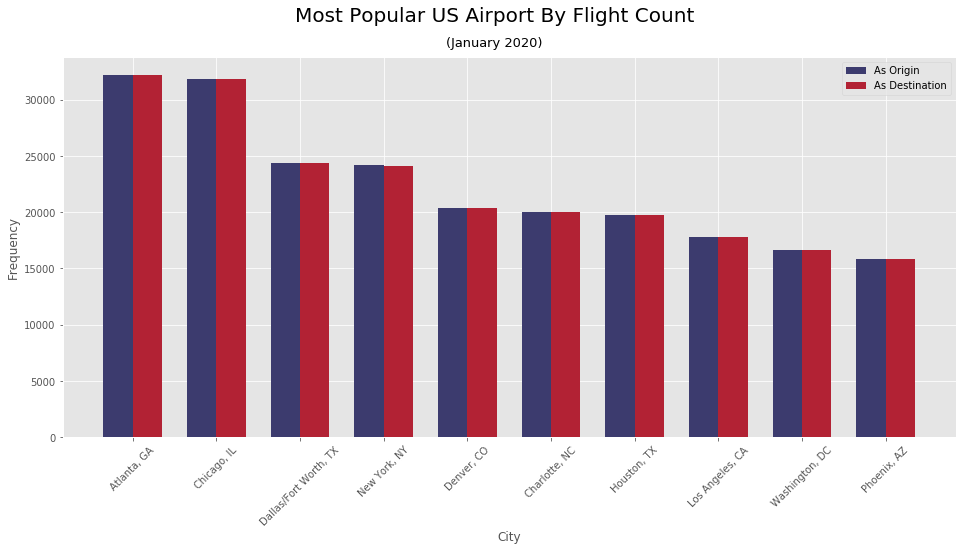

In [91]:
plot_top_10_by_state(df_raw,'US','#3C3B6E','#B22234')

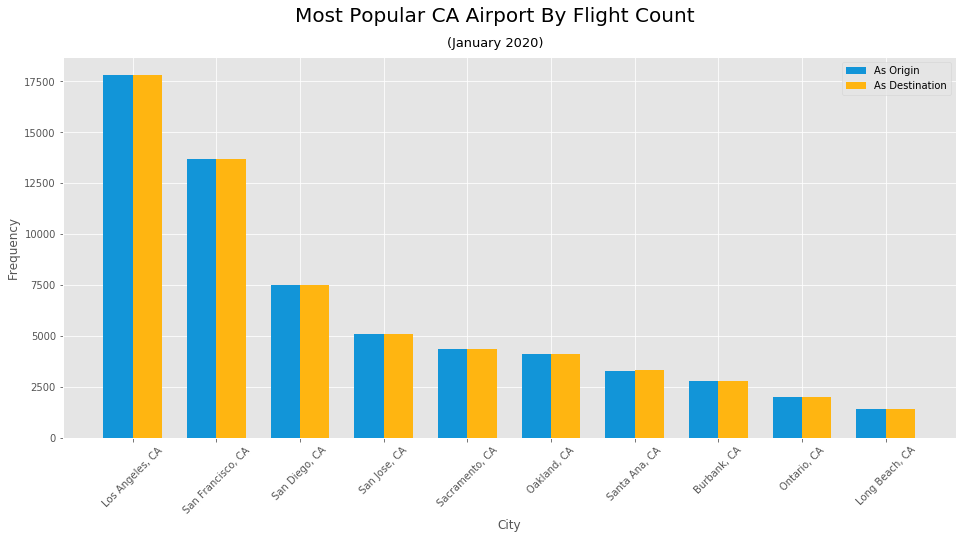

In [92]:
plot_top_10_by_state(df_raw,'CA','#1295D8','#FFB511')

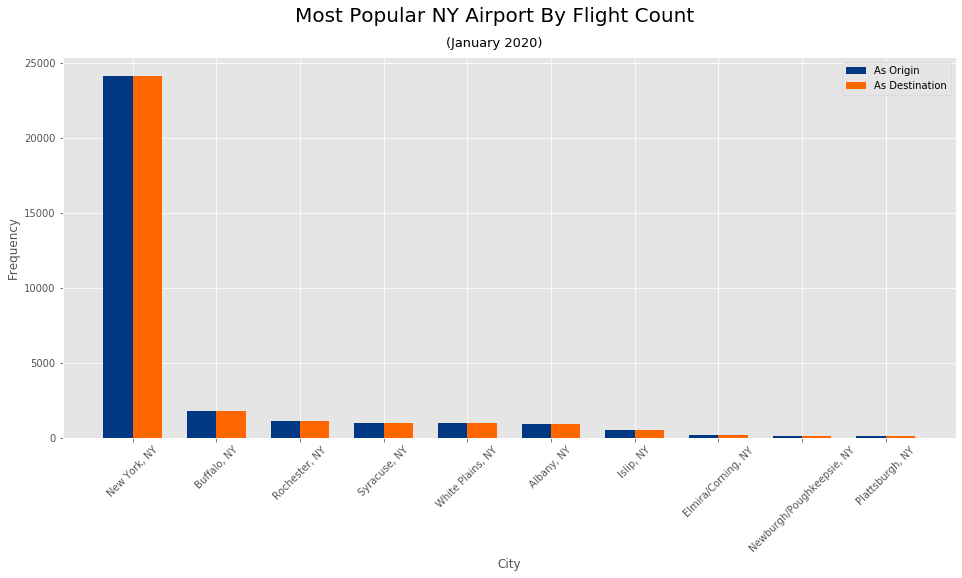

In [93]:
plot_top_10_by_state(df_raw,'NY','#003884','#ff6600')

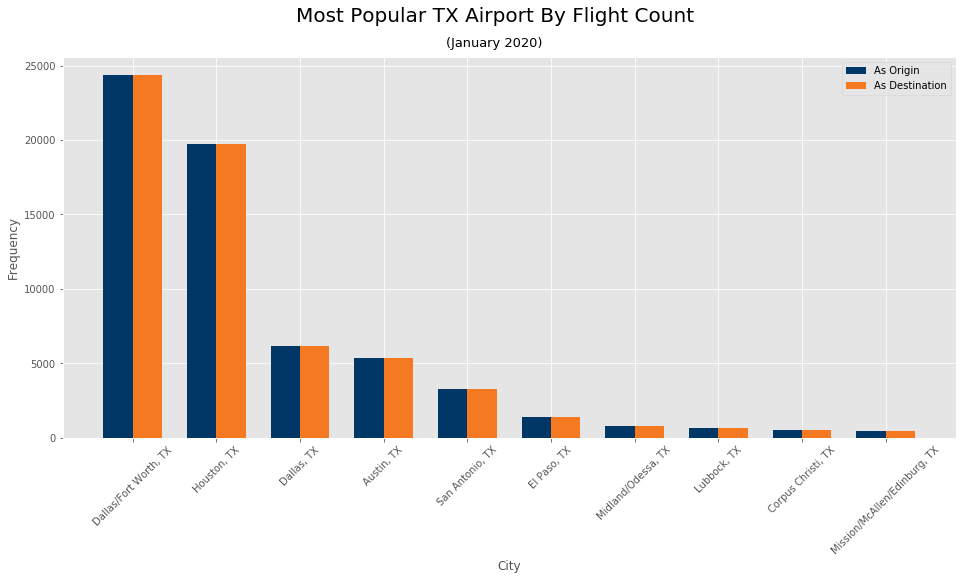

In [94]:
plot_top_10_by_state(df_raw,'TX','#003767','#F47920')

# Cancelled Flight Statistics

In [4]:
cancelled_flight = df_raw.groupby('ORIGIN_CITY_NAME').agg(
    total_flight=pd.NamedAgg(column='CANCELLED',aggfunc='count'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum')
).sort_values(by='cancelled_count',ascending=False)
cancelled_flight

,total_flight,cancelled_count
ORIGIN_CITY_NAME,,
"Chicago, IL",31796,1138.0
"Dallas/Fort Worth, TX",24339,466.0
"Denver, CO",20398,205.0
"Dallas, TX",6167,200.0
"Kansas City, MO",4321,198.0
...,...,...
"Elko, NV",58,0.0
"Dothan, AL",115,0.0
"Daytona Beach, FL",302,0.0


In [5]:
cancelled_flight = cancelled_flight.reset_index()

Text(0.5, 0.9, 'Airport with most cancelled flights in Jan 2020')

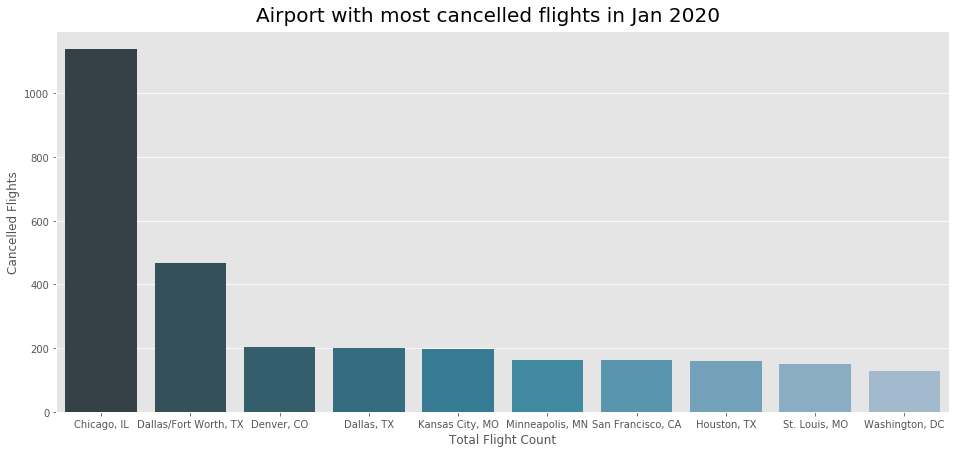

In [78]:
cancelled_flight[0:10]
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_count',data=cancelled_flight[0:10],palette='PuBuGn_d')
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.9,'Airport with most cancelled flights in Jan 2020', fontsize=20, ha='center')

In [81]:
cancelled_flight['cancelled_rate'] = cancelled_flight['cancelled_count'] / cancelled_flight['total_flight']

In [83]:
cancelled_flight.sort_values(by='cancelled_rate',ascending=False)

,ORIGIN_CITY_NAME,total_flight,cancelled_count,cancelled_rate
28,"Sun Valley/Hailey/Ketchum, ID",196,54.0,0.275510
72,"Ogdensburg, NY",62,14.0,0.225806
94,"Cordova, AK",60,10.0,0.166667
109,"Muskegon, MI",61,9.0,0.147541
130,"Yakutat, AK",60,8.0,0.133333
...,...,...,...,...
310,"Santa Maria, CA",16,0.0,0.000000
311,"Columbus, MS",112,0.0,0.000000
312,"Saipan, TT",44,0.0,0.000000
313,"Ogden, UT",9,0.0,0.000000


Text(0.5, 0.9, 'Airport with highest cancellation rate in Jan 2020')

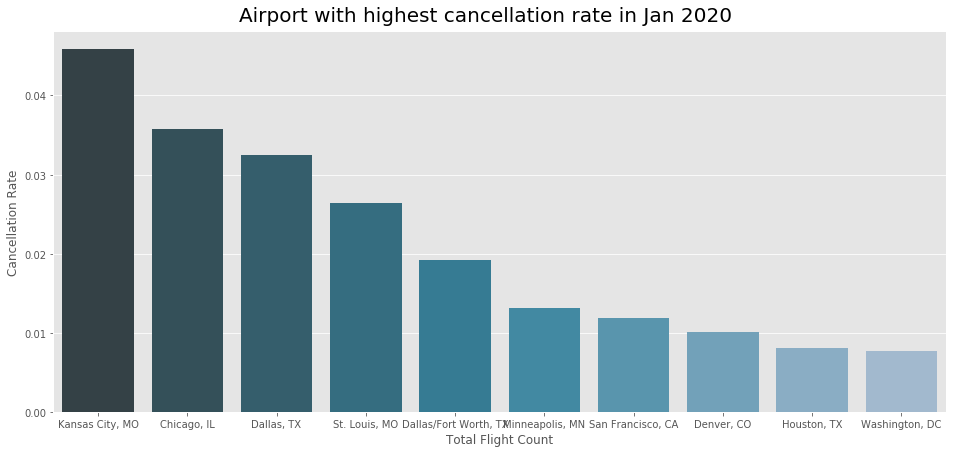

In [86]:
cancelled_flight = cancelled_flight[0:10].sort_values(by='cancelled_rate',ascending=False)
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_rate',data=cancelled_flight[0:10],palette='PuBuGn_d')
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancellation Rate')
plt.figtext(.5,.9,'Airport with highest cancellation rate in Jan 2020', fontsize=20, ha='center')

#### Correlation between flight count and cancelled flight count

In [68]:
cancelled_flight.describe()

,total_flight,cancelled_count
count,344.000000,344.000000
mean,1765.540698,20.139535
std,4380.956291,72.383400
min,1.000000,0.000000
25%,85.000000,1.000000
50%,273.000000,5.000000
75%,1026.750000,11.000000
max,32190.000000,1138.000000


In [38]:
cancelled_flight.corr()

,total_flight,cancelled_count
total_flight,1.000000,0.704857
cancelled_count,0.704857,1.000000


Text(0.85, 0.37, 'r = .705')

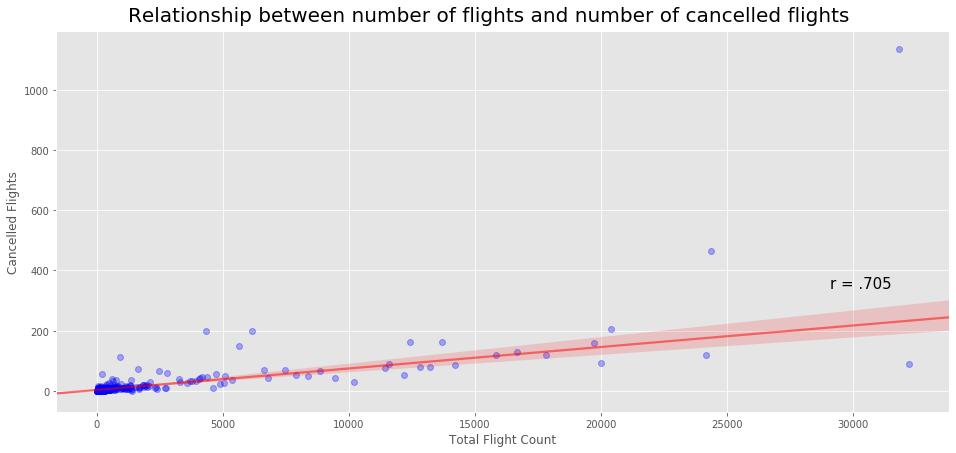

In [67]:
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.regplot(x='total_flight',y='cancelled_count',data=cancelled_flight,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.9,'Relationship between number of flights and number of cancelled flights', fontsize=20, ha='center')
plt.figtext(.85,.37,'r = .705', fontsize=15, ha='right')

#### Focus on busy airports: Flight > median

In [6]:
busy_airport = cancelled_flight[(cancelled_flight['total_flight'] > 273)]
busy_airport

,ORIGIN_CITY_NAME,total_flight,cancelled_count
0,"Chicago, IL",31796,1138.0
1,"Dallas/Fort Worth, TX",24339,466.0
2,"Denver, CO",20398,205.0
3,"Dallas, TX",6167,200.0
4,"Kansas City, MO",4321,198.0
...,...,...,...
302,"Billings, MT",308,0.0
305,"Atlantic City, NJ",287,0.0
321,"Long Beach, CA",1399,0.0
328,"St. George, UT",335,0.0


In [55]:
busy_airport.corr()

,total_flight,cancelled_count
total_flight,1.000000,0.685406
cancelled_count,0.685406,1.000000


Text(0.85, 0.37, 'r = .685')

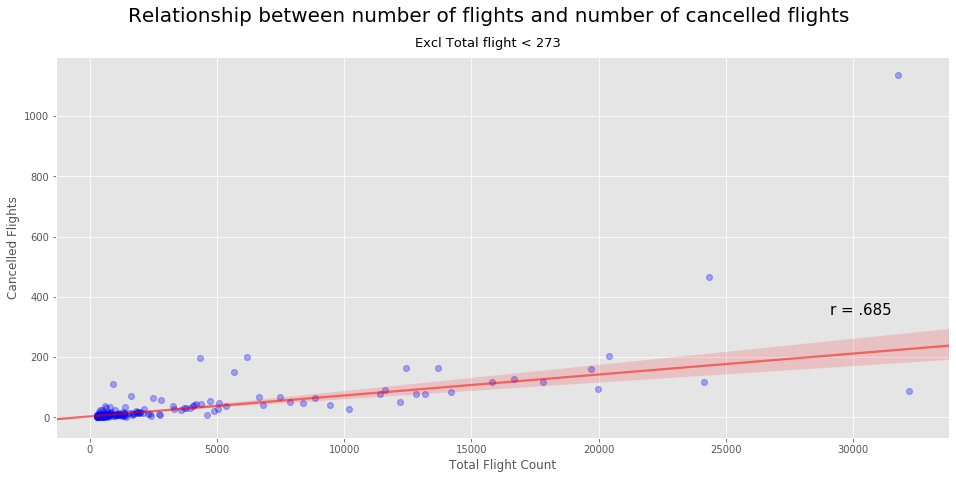

In [63]:
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.regplot(x='total_flight',y='cancelled_count',data=busy_airport,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.95,'Relationship between number of flights and number of cancelled flights', fontsize=20, ha='center')
plt.figtext(.5,.9,'Excl Total flight < 273', fontsize=13, ha='center')
plt.figtext(.85,.37,'r = .685', fontsize=15, ha='right')

#### Excluding outliers (Chicago, Dal/FW)

In [7]:
busy_airport_excl_outlier = cancelled_flight[(cancelled_flight['total_flight'] > 273) & (cancelled_flight['ORIGIN_CITY_NAME'] != 'Chicago, IL') & (cancelled_flight['ORIGIN_CITY_NAME'] != 'Dallas/Fort Worth, TX')]

busy_airport_excl_outlier

,ORIGIN_CITY_NAME,total_flight,cancelled_count
2,"Denver, CO",20398,205.0
3,"Dallas, TX",6167,200.0
4,"Kansas City, MO",4321,198.0
5,"Minneapolis, MN",12429,163.0
6,"San Francisco, CA",13684,163.0
...,...,...,...
302,"Billings, MT",308,0.0
305,"Atlantic City, NJ",287,0.0
321,"Long Beach, CA",1399,0.0
328,"St. George, UT",335,0.0


In [37]:
busy_airport_excl_outlier.corr()

,total_flight,cancelled_count
total_flight,1.00000,0.74625
cancelled_count,0.74625,1.00000


Text(0.79, 0.7, 'r = .746')

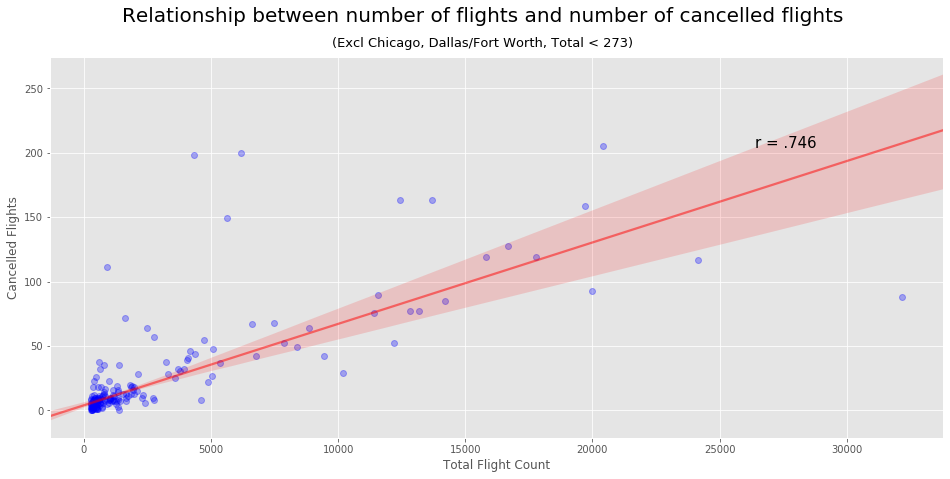

In [66]:
fig, ax = plt.subplots(figsize=(16,7))
ax = sns.regplot(x='total_flight',y='cancelled_count',data=busy_airport_excl_outlier,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancelled Flights')
plt.figtext(.5,.95,f'Relationship between number of flights and number of cancelled flights', fontsize=20, ha='center')
plt.figtext(.5,.9,'(Excl Chicago, Dallas/Fort Worth, Total < 273)',fontsize=13,ha='center')
plt.figtext(.79,.7,'r = .746', fontsize=15, ha='right')

# Flight Delay Statistics

In [151]:
flight_delay = df_raw.groupby('ORIGIN_CITY_NAME').agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    average_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    std_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='std')
).sort_values(by='average_delay_min',ascending=False)
flight_delay

,total_flight,average_delay_min,std_delay_min
ORIGIN_CITY_NAME,,,
"Alpena, MI",53,58.962264,266.735822
"Williston, ND",67,58.746269,232.130537
"Pellston, MI",75,55.400000,289.451905
"Marquette, MI",92,54.336957,170.569974
"Escanaba, MI",53,53.396226,219.408851
...,...,...,...
"Watertown, SD",56,-6.250000,24.373048
"Cedar City, UT",54,-6.277778,12.558417
"Quincy, IL",10,-7.600000,7.275530


In [110]:
delay_sfo = flight_delay.loc['San Francisco, CA']
delay_sfo

total_flight         13524.000000
average_delay_min       12.588287
std_delay_min           44.671065
Name: San Francisco, CA, dtype: float64

In [150]:
df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA")]['DEP_DELAY'].describe()

count    13524.000000
mean         9.048802
std         44.671065
min        -23.000000
25%         -6.000000
50%         -3.000000
75%          4.000000
max       1118.000000
Name: DEP_DELAY, dtype: float64

#### 95% CI

In [160]:
print(df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA")]['DEP_DELAY'].quantile(q=0.025))
print(df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA")]['DEP_DELAY'].quantile(q=0.975))

-12.0
117.0


In [148]:
sfo_delay_early = df_raw[(df_raw['ORIGIN_CITY_NAME'] == "San Francisco, CA") & (df_raw['DEP_DELAY'].isnull() == False)][['ORIGIN_CITY_NAME','DEP_DELAY']].sort_values(by='DEP_DELAY',ascending=False)
sfo_delay_early

,ORIGIN_CITY_NAME,DEP_DELAY
252122,"San Francisco, CA",1118.0
268330,"San Francisco, CA",960.0
95569,"San Francisco, CA",942.0
41375,"San Francisco, CA",822.0
554428,"San Francisco, CA",796.0
...,...,...
508705,"San Francisco, CA",-21.0
355929,"San Francisco, CA",-22.0
354696,"San Francisco, CA",-23.0
507418,"San Francisco, CA",-23.0


Text(0.5, 0.95, 'SFO Flight Delay (As Origin)')

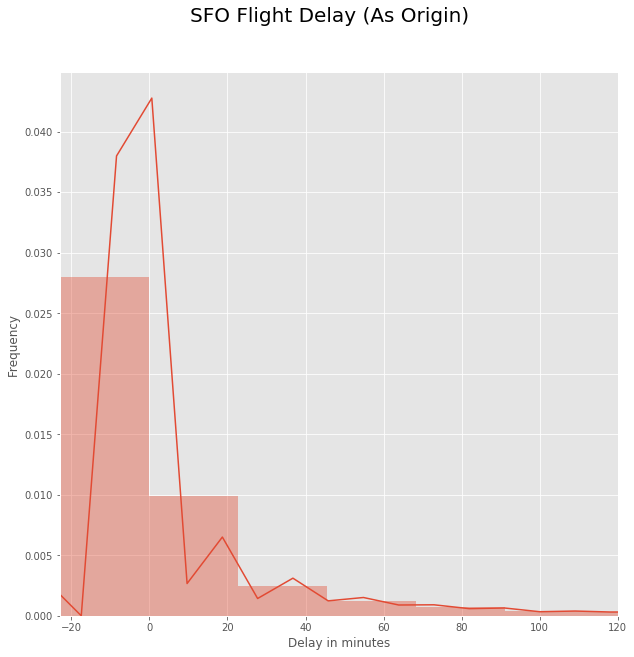

In [162]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.distplot(sfo_delay_early.DEP_DELAY)
ax.set_xlabel('Delay in minutes')
ax.set_ylabel('Frequency')
plt.xlim(-23,120)
plt.figtext(.5,.95,'SFO Flight Delay (As Origin)', fontsize=20, ha='center')